In [165]:
# Nama : Debora Udania Simanjuntak
# Kelas : Belajar Pengembangan Machine Learning

In [164]:
# Import the libraries and data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [149]:
data=pd.read_csv("monthly-sunspots.csv")
data.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [150]:
data=data[600:]

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 600 to 2819
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     2220 non-null   object 
 1   Sunspots  2220 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.8+ KB


In [152]:
skala=(max(data.Sunspots)-min(data.Sunspots))*0.1
skala

25.380000000000003

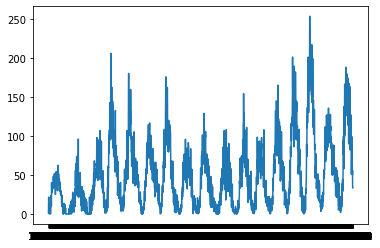

In [153]:
# Visualize the data

plt.plot(data.Month,data.Sunspots)

In [154]:
# Split the data into train and test
length=len(data)

train=data[1:round(length*0.8)]
test=data[round(length*0.8):]



In [155]:
sunspots_train=train.Sunspots.values
month_train=train.Month.values
sunspots_test=test.Sunspots.values
month_test=test.Month.values

In [156]:
sunspots_train=sunspots_train.reshape((-1,1))
sunspots_test=sunspots_test.reshape((-1,1))

In [158]:
# Make a function to return label and atribute from the dataset
import tensorflow as tf
from keras.layers import Dense, LSTM,Dropout
from keras.models import Sequential

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

train_set =windowed_dataset(sunspots_train.reshape((len(train),)),120,40,1000)

In [159]:
test_set=windowed_dataset(sunspots_test.reshape((len(test),)),120,40,1000)


In [160]:
# Build the model

model=Sequential([LSTM(60,return_sequences=True),
                  LSTM(60),
                  Dropout(0.5),
                  Dense(30,activation='relu'),
                  Dense(10,activation='relu'),
                  Dense(1)])

optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [161]:
# Make callback function
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<skala ) and (logs.get('val_mae')<skala):
      print("\mae and val_mae have reached < 10 percent skala!")
      self.model.stop_training = True
callbacks = myCallback()

In [162]:
# Train the Model
history = model.fit(train_set,epochs=100,validation_data=test_set,callbacks=[callbacks])

Epoch 1/100
42/42 [==============================] - 12s 164ms/step - loss: 42.1285 - mae: 42.6046 - val_loss: 82.0577 - val_mae: 82.5577
Epoch 2/100
42/42 [==============================] - 6s 132ms/step - loss: 42.7251 - mae: 43.2042 - val_loss: 81.8109 - val_mae: 82.3109
Epoch 3/100
42/42 [==============================] - 6s 133ms/step - loss: 41.6733 - mae: 42.1554 - val_loss: 81.4578 - val_mae: 81.9578
Epoch 4/100
42/42 [==============================] - 6s 132ms/step - loss: 43.1322 - mae: 43.6191 - val_loss: 80.7957 - val_mae: 81.2953
Epoch 5/100
42/42 [==============================] - 6s 132ms/step - loss: 42.6843 - mae: 43.1754 - val_loss: 79.8483 - val_mae: 80.3476
Epoch 6/100
42/42 [==============================] - 6s 131ms/step - loss: 41.1924 - mae: 41.6851 - val_loss: 78.4430 - val_mae: 78.9426
Epoch 7/100
42/42 [==============================] - 6s 133ms/step - loss: 39.4297 - mae: 39.9225 - val_loss: 76.1111 - val_mae: 76.6103
Epoch 8/100
42/42 [=====================

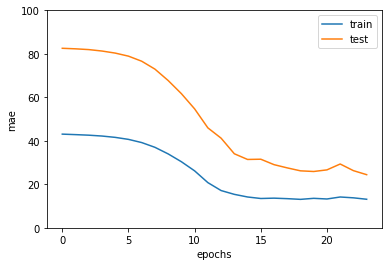

In [168]:
plt.plot(history.history.get('mae'))
plt.plot(history.history.get('val_mae'))
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend(['train','test'])
plt.ylim(0,100)
plt.show()

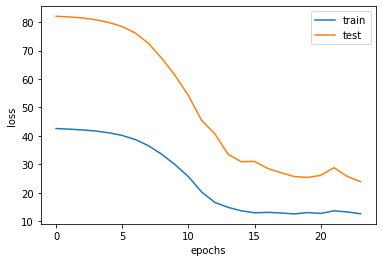

In [169]:
plt.plot(history.history.get('loss'))
plt.plot(history.history.get('val_loss'))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()